# Proyecto de análisis de Y.Afisha

Analizaremos el periodo de Enero de 2017 a Diciembre de 2018, los pedidos en este periodo, los gastos de marketing y los registros del servidor para conocer información acerca de las visitas a Y.Afisha.

El objetivo es ayudar a optimizar los gastos de marketing.

Se busca investigar cómo los clientes usan el servicio, cuándo empiezan a comprar, cuánto dinero aporta cada cliente a la compañía y cuándo los ingresos cubren el costo de adquisición de los clientes.


## Preparación de los datos

Vamos a preparar y limpiar nuestros datos, identificando duplicados y ausentes, así como conviertiendo datos al tipo de datos más útil para nuestro análisis.

### Cargar datos 

In [1]:
# Cargamos todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import math

In [2]:
# Cargamos los dataset
df_visits = pd.read_csv('/datasets/visits_log_us.csv', header='infer')
df_orders = pd.read_csv('/datasets/orders_log_us.csv', header='infer')
df_costs = pd.read_csv('/datasets/costs_us.csv', header='infer')

### Descripción de los datos

El DataFrame **visits** contiene los registros del servidor con datos sobre las visitas al sitio web:
* Uid: identificador único del usuario;
* Device: dispositivo del usuario;
* Start Ts: fecha y hora de inicio de la sesión;
* End Ts: fecha y hora de término de la sesión;
* Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

El DataFrame **orders** contiene los datos sobre pedidos:
* Uid: identificador único del usuario que realiza un pedido;
* Buy Ts: fecha y hora del pedido;
* Revenue: ingresos de Y.Afisha de este pedido.

El DataFrame **costs** contiene los datos sobre gastos de marketing:
* source_id: identificador de la fuente de anuncios
* dt: fecha;
* costs: gastos en esta fuente de anuncios en este día.

#### df_visits

In [3]:
# Imprimimos información general de df_visits y verificamos si hay filas duplicadas
df_visits.info()
print(df_visits.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
0


In [4]:
# Mostramos los detalles del DataFrame
df_visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [5]:
#Mostramos el DataFrame
display(df_visits.head())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


#### df_orders

In [6]:
# Imprimimos información general de df_orders y verificamos si hay filas duplicadas
df_orders.info()
print(df_orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
0


In [7]:
# Mostramos los detalles del DataFrame
df_orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [8]:
#Mostramos el DataFrame
display(df_orders.head())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


#### df_costs

In [9]:
# Imprimimos información general de df_costs y verificamos si hay filas duplicadas
df_costs.info()
print(df_costs.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
0


In [10]:
# Mostramos los detalles del DataFrame
df_costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [11]:
#Mostramos el DataFrame
display(df_costs.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


**Observaciones**

* En ninguno de los DataFrames tenemos datos ausentes ni filas completamente duplicadas 
* Es necesario cambiar los nombres de las columnas en los DataFrames **df_visits** y **df_orders**
* Cambiaremos el tipo de datos a datetime para las columnas *End Ts* y *Start Ts* de **df_visits**, así como *Buy Ts* de **df_orders**, y *dt* de **df_costs**
* Cambiaremos el tipo de datos a category para la columna *Device* de **df_visits**


### Limpieza de datos

#### df_visits

In [12]:
# Cambiamos el nombre de las columnas a snake_case
columns_new1 = {
    "Device": "device",
    "End Ts": "end_ts",
    "Source Id": "source_id",
    "Start Ts": "start_ts",
    "Uid": "uid"}
df_visits = df_visits.rename(columns = columns_new1)
print(df_visits.head())

    device               end_ts  source_id             start_ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [13]:
# Cambiamos el tipo de datos a datetime
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'], format="%Y-%m-%d %H:%M:%S")
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'], format="%Y-%m-%d %H:%M:%S")

In [14]:
# Verificamos los datos en la columna 'device'
print(df_visits['device'].value_counts())

desktop    262567
touch       96833
Name: device, dtype: int64


In [15]:
# Cambiamos el tipo de datos a category 
df_visits['device'] = df_visits['device'].astype('category')
print(df_visits.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None


#### df_orders

In [16]:
# Cambiamos el nombre de las columnas a snake_case
columns_new2 = {
    "Buy Ts": "buy_ts",
    "Revenue": "revenue",
    "Uid": "uid"}
df_orders = df_orders.rename(columns = columns_new2)
print(df_orders.head())

                buy_ts  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [17]:
# Cambiamos el tipo de datos a datetime
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")
print(df_orders.dtypes)

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object


#### df_costs

In [18]:
# Cambiamos el tipo de datos a datetime
df_costs['dt'] = pd.to_datetime(df_costs['dt'], format="%Y-%m-%d")
print(df_costs.dtypes)

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


## Calculo de métricas

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

In [19]:
# Primero crearemos columnas separadas para los valores de año, mes, semana y la fecha sin la hora 
df_visits['session_year']  = df_visits['start_ts'].dt.year
df_visits['session_month'] = df_visits['start_ts'].dt.month
df_visits['session_week']  = df_visits['start_ts'].dt.week
df_visits['session_date'] = df_visits['start_ts'].dt.date
print(df_visits.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  
3   2018-05-20  
4   2017-12-27  


In [20]:
# Obtenemos el DAU, cuántos usuarios activos diarios
dau_total = df_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
print(int(dau_total))

907


In [21]:
# Obtenemos el WAU, cuántos usuarios activos semanales
wau_total = df_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print(int(wau_total))

5716


In [22]:
# Obtenemos el MAU, cuántos usuarios activos mensuales
mau_total = df_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print(int(mau_total))

23228


##### Dispositivo touch

In [23]:
# Obtenemos el DAU, cuántos usuarios activos diarios
dau_touch = df_visits.query("device == 'touch'").groupby('session_date').agg({'uid': 'nunique'}).mean()
print(int(dau_touch))

252


In [24]:
# Obtenemos el WAU, cuántos usuarios activos semanales
wau_touch = df_visits.query("device == 'touch'").groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print(int(wau_touch))

1634


In [25]:
# Obtenemos el MAU, cuántos usuarios activos mensuales
mau_touch = df_visits.query("device == 'touch'").groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print(int(mau_touch))

6825


##### Dispositivo desktop

In [26]:
# Obtenemos el DAU, cuántos usuarios activos diarios
dau_desktop = df_visits.query("device == 'desktop'").groupby('session_date').agg({'uid': 'nunique'}).mean()
print(int(dau_desktop))

659


In [27]:
# Obtenemos el WAU, cuántos usuarios activos semanales
wau_desktop = df_visits.query("device == 'desktop'").groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print(int(wau_desktop))

4129


In [28]:
# Obtenemos el MAU, cuántos usuarios activos mensuales
mau_desktop = df_visits.query("device == 'desktop'").groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print(int(mau_desktop))

16724


          uid   device
0  907.991758    total
1  659.244505  desktop
2  252.873278    touch


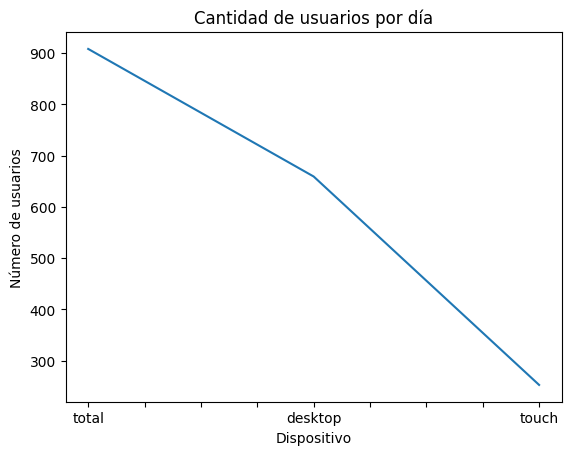

In [29]:
dau_graph = pd.DataFrame([dau_total,dau_desktop,dau_touch])
dau_graph['device'] =['total','desktop','touch']
print(dau_graph)

dau_graph.plot(x='device',
                  y=['uid'],
                  title='Cantidad de usuarios por día',
                  xlabel='Dispositivo',
                  ylabel='Número de usuarios',
                  legend=False )
plt.show()


           uid   device
0  5716.245283    total
1  4129.509434  desktop
2  1634.924528    touch


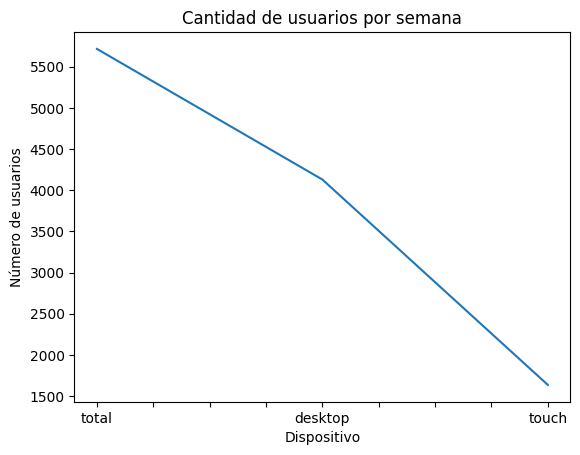

In [30]:
wau_graph = pd.DataFrame([wau_total,wau_desktop,wau_touch])
wau_graph['device'] =['total','desktop','touch']
print(wau_graph)

wau_graph.plot(x='device',
                  y='uid',
                  title='Cantidad de usuarios por semana',
                  xlabel='Dispositivo',
                  ylabel='Número de usuarios',
                  legend=False )
plt.show()

            uid   device
0  23228.416667    total
1  16724.916667  desktop
2   6825.916667    touch


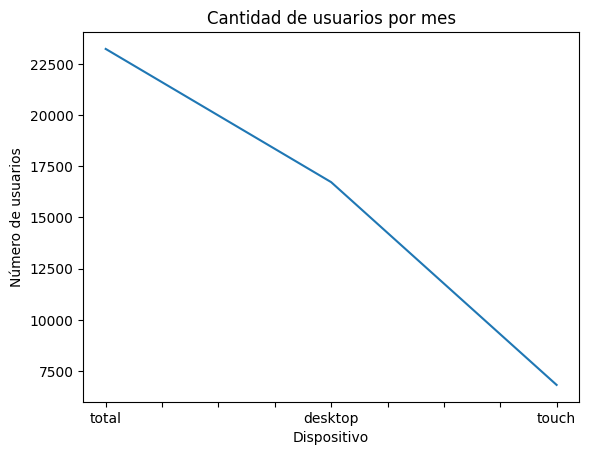

In [31]:
mau_graph = pd.DataFrame([mau_total,mau_desktop, mau_touch])
mau_graph['device'] =['total','desktop', 'touch']
print(mau_graph)

mau_graph.plot(x='device',
                  y='uid',
                  title='Cantidad de usuarios por mes',
                  xlabel='Dispositivo',
                  ylabel='Número de usuarios',
                  legend=False )
plt.show()

**Observaciones** 
* Analizando ambos dispoitivos:
    * 907 usuarios en promedio usan el sitio cada día 
    * 5716 usuarios en promedio usan el sitio cada semana 
    * 23228 usuarios en promedio usan el sitio cada mes
* En el dispositivo **touch**:
    * 252 usuarios en promedio usan el sitio cada día 
    * 1634 usuarios en promedio usan el sitio cada semana 
    * 6825 usuarios en promedio usan el sitio cada mes
* En el dispositivo **desktop**:
    * 659 usuarios en promedio usan el sitio cada día 
    * 4129 usuarios en promedio usan el sitio cada semana 
    * 16724 usuarios en promedio usan el sitio cada mes
    

* El 72% de los usuarios usaron el dispositivo **desktop** para su sesión diaria, semanal y mensual.

* Gracias a nuestros gráficos podemos notar la misma distribución tanto por día, semana y mes.

#### ¿Cuántas sesiones hay por día? 

In [32]:
# Obtenemos las sesiones por día 
sessions_per_user = df_visits.groupby(['session_date']).agg(
    {'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']

sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
print(sessions_per_user.head())
print(sessions_per_user['sessions_per_user'].mean())
print(sessions_per_user['sessions_per_user'].min())
print(sessions_per_user['sessions_per_user'].max())

              n_sessions  n_users  sessions_per_user
session_date                                        
2017-06-01           664      605           1.097521
2017-06-02           658      608           1.082237
2017-06-03           477      445           1.071910
2017-06-04           510      476           1.071429
2017-06-05           893      820           1.089024
1.082169644003972
1.0
1.2178366978005424


In [33]:
# Obtenemos las sesiones por día para el dispositivo touch
sessions_per_user_touch = df_visits.query("device == 'touch'").groupby(['session_date']).agg(
    {'uid': ['count', 'nunique']})
sessions_per_user_touch.columns = ['n_sessions', 'n_users']

sessions_per_user_touch['sessions_per_user'] = (
    sessions_per_user_touch['n_sessions'] / sessions_per_user_touch['n_users'])
print(sessions_per_user_touch.head())
print(sessions_per_user_touch['sessions_per_user'].mean())

              n_sessions  n_users  sessions_per_user
session_date                                        
2017-06-01           163      153           1.065359
2017-06-02           160      152           1.052632
2017-06-03           148      139           1.064748
2017-06-04           161      153           1.052288
2017-06-05           200      195           1.025641
1.0510715741665035


In [34]:
# Obtenemos las sesiones por día para el dispositivo desktop
sessions_per_user_desktop = df_visits.query("device == 'desktop'").groupby(['session_date']).agg(
    {'uid': ['count', 'nunique']})
sessions_per_user_desktop.columns = ['n_sessions', 'n_users']

sessions_per_user_desktop['sessions_per_user'] = (
    sessions_per_user_desktop['n_sessions'] / sessions_per_user_desktop['n_users'])
print(sessions_per_user_desktop.head())
print(sessions_per_user_desktop['sessions_per_user'].mean())

              n_sessions  n_users  sessions_per_user
session_date                                        
2017-06-01           501      455           1.101099
2017-06-02           498      458           1.087336
2017-06-03           329      307           1.071661
2017-06-04           349      326           1.070552
2017-06-05           693      631           1.098257
1.0889553115247612


**Observaciones**
* Cada usuario tiene en promedio 1 sesión por día sin importar el dispositivo que usen.

#### ¿Cuál es la duración de cada sesión?

In [35]:
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
print(df_visits['session_duration_sec'].mean())

643.506488592098


<AxesSubplot:>

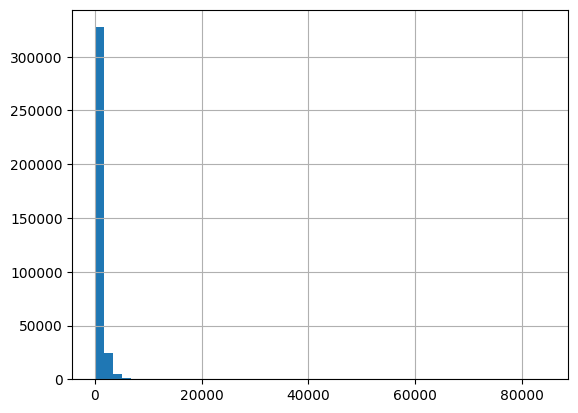

In [36]:
# Revisamos la distribución para verificar si la media es la mejor métrica a tomar en cuenta
df_visits['session_duration_sec'].hist(bins=50)

In [37]:
# Debido a que la distribución no es normal, calcularemos la moda
print(df_visits['session_duration_sec'].mode())

0    60
dtype: int64


In [38]:
session_duration_touch = df_visits.query("device == 'touch'")['session_duration_sec'].mean()
print(session_duration_touch)

479.6194066072517


In [39]:
session_duration_desktop = df_visits.query("device == 'desktop'")['session_duration_sec'].mean()
print(session_duration_desktop)

703.9469773429258


**Observaciones** 
* La duración promedio es de 1 minuto por sesión sin importar el dispositivo. 
* La duración promedio usando el dispositivo desktop es mayor que la del dispositivo touch, talvez se deba porque en la aplicación se requieren menos pasos para hacer un pedido en el escritorio.

#### ¿Con qué frecuencia los usuarios y las usuarias regresan?


In [40]:
# Calculamos el Sticky Factor de ambos dispositivos
sticky_mau_total = (dau_total/mau_total) *100

print(sticky_mau_total)

uid    3.90897
dtype: float64


In [41]:
# Calculamos el Sticky Factor del dispositivo touch
sticky_mau_touch = (dau_touch/mau_touch) *100

print(sticky_mau_touch)

uid    3.704605
dtype: float64


In [42]:
# Calculamos el Sticky Factor del dispositivo desktop
sticky_mau_desktop = (dau_desktop/mau_desktop) *100

print(sticky_mau_desktop)

uid    3.941691
dtype: float64


**Observaciones**
* Tenemos un 3% de adherencia, esto sugiere que los usuarios usan la aplicación 1 vez al mes.
* Hay una diferencia de 0.20% entre los 2 dispositivos, donde **desktop** tiene mayor adeherencia que **touch** 

### Ventas

#### ¿Cuándo la gente empieza a comprar? 

In [43]:
# Creamos un DataFrame con las ordenes y las visitas para conocer si la compra ocurre el mismo día del registro
df_visits_orders = df_orders.merge(df_visits, on='uid', how='left')

#Sacamos las primeras fechas de visita y de orden
first_visit = df_visits_orders.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit'
first_order = df_visits_orders.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order'

#Agregamos las columnas a DataFrame
df_visits_orders = df_visits_orders.join(first_visit, on='uid')
df_visits_orders = df_visits_orders.join(first_order, on='uid')

# Sacamos la conversión en días primero para separar a los usuarios que hicieron compra el día 0  
df_visits_orders['first_conversion'] = df_visits_orders['first_order'] - df_visits_orders['first_visit']
df_visits_orders['first_conversion'] = df_visits_orders['first_conversion'] / np.timedelta64(1,'D')
df_visits_orders['first_conversion'] = df_visits_orders['first_conversion'].astype(int)

# Sacamos los resultados por semana y por mes, teniendo ya nuestros números de los usuarios que hicieron la compra el mismo día de la visita
conversion = df_visits_orders.groupby('first_conversion').agg({'uid': 'nunique'}).reset_index()
conversion['week'] = conversion['first_conversion'] / 7 
conversion['week'] = conversion['week'].apply(math.ceil)
conversion['month'] = conversion['first_conversion'] / 30 
conversion['month'] = conversion['month'].apply(math.ceil)
print(conversion.head())

   first_conversion    uid  week  month
0                 0  26363     0      0
1                 1   1011     1      1
2                 2    563     1      1
3                 3    434     1      1
4                 4    324     1      1


    month    uid
0       0  26363
1       1   5258
2       2   1356
3       3    918
4       4    740
5       5    560
6       6    448
7       7    313
8       8    222
9       9    151
10     10    101
11     11     49
12     12     42
13     13      2
36523


<function matplotlib.pyplot.show(close=None, block=None)>

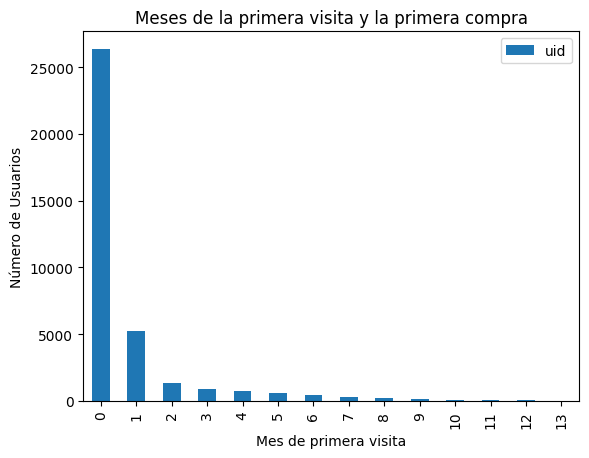

In [44]:
# Mostramos una gráfica
conversion_graphic = conversion.groupby('month')['uid'].sum().reset_index()
print(conversion_graphic)
print(conversion_graphic['uid'].sum())
conversion_graphic.plot(x='month',
        y= 'uid',
        title= 'Meses de la primera visita y la primera compra',
        xlabel= 'Mes de primera visita',
        ylabel= 'Número de Usuarios',
        kind='bar')
plt.show

**Observaciones**
* El 72% de los usuarios hacen sus ordenes en el mismo día de su primer visita
* El 14% de los usuarios hacen sus ordenes en el mismo mes de su primera visita 
    * De los cuales el 58% de los usuarios hicieron su orden en la misma semana de su primera visita
* El 4% de los usuarios espera hasta el segundo mes a partir de su primera visita, para hacer su primera orden
* Sólo el 2% de los usuarios espera más de 6 meses para hacer su primera orden a partir de su primera visita


##### Por dispositivo

In [45]:
# Sacamos la conversión de visitas a ordenes para el dispositivo touch
conversion_touch = df_visits_orders.query("device == 'touch'").groupby('first_conversion').agg({'uid': 'nunique'}).reset_index()
conversion_touch['week'] = conversion_touch['first_conversion'] / 7 
conversion_touch['week'] = conversion_touch['week'].apply(math.ceil)
conversion_touch['month'] = conversion_touch['first_conversion'] / 30 
conversion_touch['month'] = conversion_touch['month'].apply(math.ceil)
print(conversion_touch)

     first_conversion   uid  week  month
0                   0  5522     0      0
1                   1   308     1      1
2                   2   208     1      1
3                   3   148     1      1
4                   4    87     1      1
..                ...   ...   ...    ...
299               349     1    50     12
300               352     1    51     12
301               355     1    51     12
302               357     3    51     12
303               362     1    52     13

[304 rows x 4 columns]


In [46]:
# Sacamos la conversión de visitas a ordenes para el dispositivo desktop
conversion_desktop = df_visits_orders.query("device == 'desktop'").groupby('first_conversion').agg({'uid': 'nunique'}).reset_index()
conversion_desktop['week'] = conversion_desktop['first_conversion'] / 7 
conversion_desktop['week'] = conversion_desktop['week'].apply(math.ceil)
conversion_desktop['month'] = conversion_desktop['first_conversion'] / 30 
conversion_desktop['month'] = conversion_desktop['month'].apply(math.ceil)
print(conversion_desktop)

     first_conversion    uid  week  month
0                   0  22098     0      0
1                   1    825     1      1
2                   2    429     1      1
3                   3    352     1      1
4                   4    269     1      1
..                ...    ...   ...    ...
337               352      2    51     12
338               354      1    51     12
339               355      3    51     12
340               357      3    51     12
341               363      1    52     13

[342 rows x 4 columns]


    month  uid_touch  uid_desktop
0       0       5522        22098
1       1       1701         4284
2       2        468         1130
3       3        312          793
4       4        256          643
5       5        197          484
6       6        162          391
7       7        107          274
8       8         81          190
9       9         51          137
10     10         29           94
11     11         12           44
12     12         13           39
13     13          1            1
Total de usuarios de touch 8912
Total de usuarios de desktop 30602


<function matplotlib.pyplot.show(close=None, block=None)>

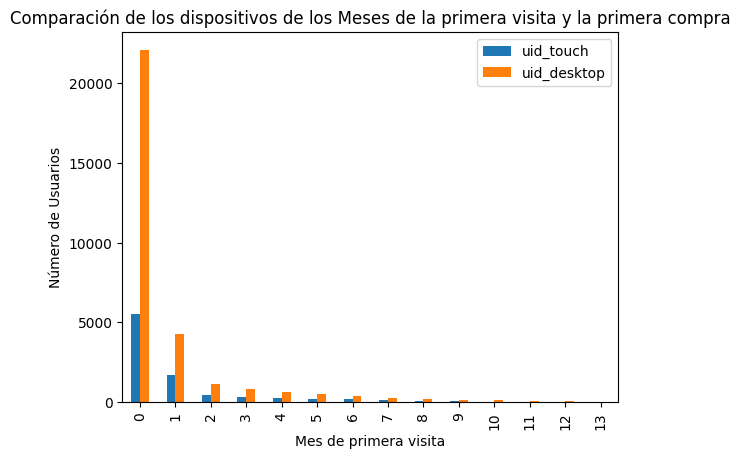

In [47]:
# Unimos los datos en un solo gráfico
con_touch_graphic = conversion_touch.groupby('month')['uid'].sum().reset_index()
con_desktop_graphic = conversion_desktop.groupby('month')['uid'].sum().reset_index()

conversion_device = con_touch_graphic.merge(con_desktop_graphic,on='month', suffixes=['_touch','_desktop'])
print(conversion_device)
print('Total de usuarios de touch', conversion_device['uid_touch'].sum())
print('Total de usuarios de desktop', conversion_device['uid_desktop'].sum())
conversion_device.plot(x='month',
        y= ['uid_touch','uid_desktop'],
        title= 'Comparación de los dispositivos de los Meses de la primera visita y la primera compra',
        xlabel= 'Mes de primera visita',
        ylabel= 'Número de Usuarios',
        kind='bar')
plt.show

**Observaciones** 

* El **72%** de los usuarios que usaron **desktop** hacen sus ordenes en el mismo día de su primer visita
* El **62%** de los usuarios que usaron **touch** hacen sus ordenes en el mismo día de su primer visita
* El **14%** de los usuarios que usaron **desktop** hacen sus ordenes en el mismo mes de su primera visita 
    * De los cuales el **58%** de los usuarios hicieron su orden en la misma semana de su primera visita
* El **19%** de los usuarios que usaron **touch** hacen sus ordenes en el mismo mes de su primera visita 
    * De los cuales el **58%** de los usuarios hicieron su orden en la misma semana de su primera visita
* El **3%** de los usuarios que usaron **desktop** espera hasta el segundo mes a partir de su primera visita, para hacer su primera orden
* El **5%** de los usuarios que usaron **touch** espera hasta el segundo mes a partir de su primera visita, para hacer su primera orden

* Los usuarios que usaron **desktop** que hicieron sus ordenes el mismo día de su primer visita representan el **56%** del total de los usuarios 
* Los usuarios que usaron **touch** que hicieron sus ordenes el mismo día de su primer visita representan el **14%** del total de los usuarios 


#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [48]:
#Sacamos la primera fecha de orden y la unimos a df_orders
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')

first_order_date = df_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_order_date.columns = ['uid', 'first_order_month']
df_orders = df_orders.merge(first_order_date, on='uid')

print(df_orders)


                   buy_ts  revenue                   uid order_month  \
0     2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1     2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2     2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3     2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4     2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   
...                   ...      ...                   ...         ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624  2018-05-01   
50411 2018-05-31 23:50:00     5.80  11369640365507475976  2018-05-01   
50412 2018-05-31 23:54:00     0.30   1786462140797698849  2018-05-01   
50413 2018-05-31 23:56:00     3.67   3993697860786194247  2018-05-01   
50414 2018-06-01 00:02:00     3.42     83872787173869366  2018-06-01   

      first_order_month  
0            2017-06-01  
1            2017-06-01  
2            2017-06-01  
3            2017-06-01  
4    

In [49]:
# Sacamos el ciclo de vida por mes 
df_orders['cohort_lifetime'] = df_orders['order_month'] - df_orders['first_order_month'] 
df_orders['cohort_lifetime'] = df_orders['cohort_lifetime'] / np.timedelta64(1, 'M')
df_orders['cohort_lifetime'] = (df_orders['cohort_lifetime'].round().astype('int'))

df_orders['first_order_month']= df_orders['first_order_month'].dt.strftime('%Y-%m')
print(df_orders)

                   buy_ts  revenue                   uid order_month  \
0     2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1     2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2     2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3     2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4     2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   
...                   ...      ...                   ...         ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624  2018-05-01   
50411 2018-05-31 23:50:00     5.80  11369640365507475976  2018-05-01   
50412 2018-05-31 23:54:00     0.30   1786462140797698849  2018-05-01   
50413 2018-05-31 23:56:00     3.67   3993697860786194247  2018-05-01   
50414 2018-06-01 00:02:00     3.42     83872787173869366  2018-06-01   

      first_order_month  cohort_lifetime  
0               2017-06                0  
1               2017-06                0  
2     

<AxesSubplot:title={'center':'Pedidos durante un mes a partir del primer mes de orden'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

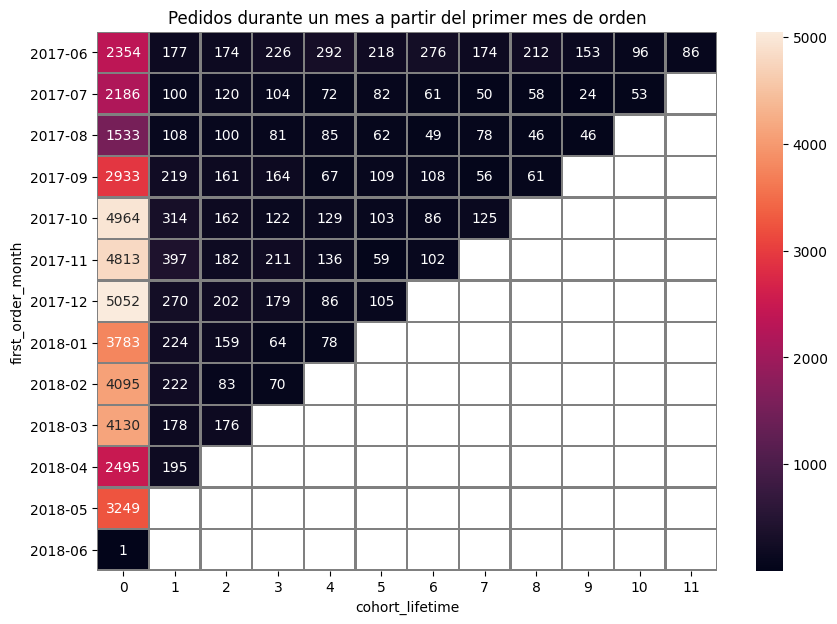

In [50]:
# Hacemos una tabla dinámica para sacar el número de pedidos de acuerdo al ciclo de vida 
order_amount_pivot = df_orders.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime',
    values='uid',
    aggfunc='count',)

plt.figure(figsize=(10, 7))
plt.title('Pedidos durante un mes a partir del primer mes de orden')
sns.heatmap(
    order_amount_pivot,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='gray')

**Observaciones**

* En el primer mes de orden es cuando se hacen el mayor porcentaje de pedidos 
* Vemos que el mes en el que se hizo más pedidos fue en Diciembre de 2017, seguido de Octubre de 2017 y Noviembre de 2017. Podemos asumir que los usuarios requiere de nuestros servicios en mayor parte en invierno, o antes de las festividades navideñas. 
* El mes en el que menos realizaron pedidos fue en Agosto de 2017, seguido de Julio de 2017 y Junio de 2017. Asumimos nuevamente que esto es debido al clima o que los servicios no son requeridos en verano.
* A partir del segundo mes de la primera orden, las compras bajan más de un 90%
* Tomando de ejemplo Junio de 2017, vemos que tanto para el cuarto mes y el sexto mes del ciclo suben los pedidos, teniendo en cuenta que el cuarto mes del ciclo es Octubre, y el sexto es Diciembre, reiteramos que los meses con mayor auge para los pedidos son de Octubre a Diciembre. 


#### ¿Cuál es el tamaño promedio de compra?

<AxesSubplot:title={'center':'Tamaño promedio de compra '}, xlabel='cohort_lifetime', ylabel='first_order_month'>

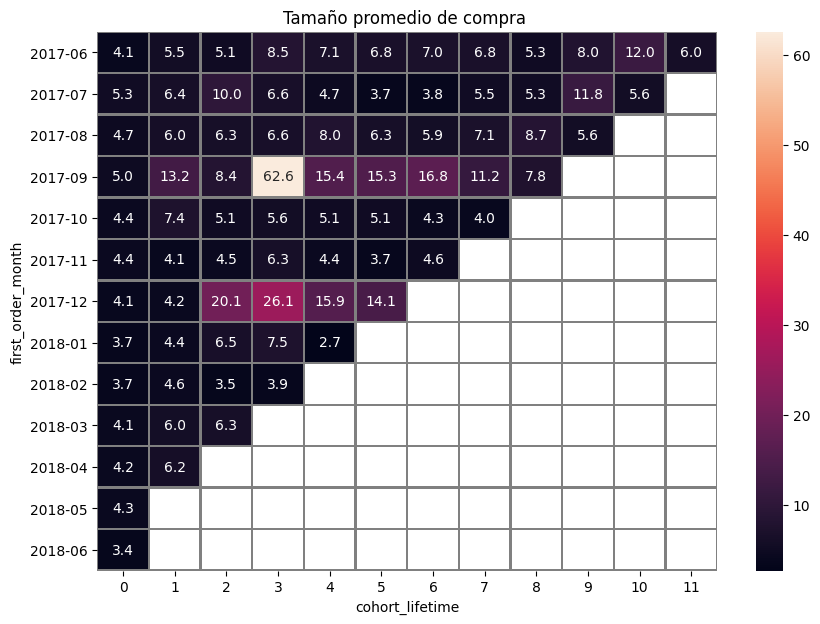

In [51]:
# Hacemos una tabla dinámica para sacar el promedio de compra 
average_order_pivot = df_orders.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime',
    values='revenue',
    aggfunc='mean',)

plt.figure(figsize=(10, 7))
plt.title('Tamaño promedio de compra ')
sns.heatmap(
    average_order_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray')

In [52]:
print(average_order_pivot[0].mean())
print(average_order_pivot[1].mean())
print(average_order_pivot[2].mean())

4.259537474884146
6.189028005242466
7.563060402577702


**Observaciones**

* Gracias al análisis anterior, observamos que en el cohorte de Junio de 2018 sólo hubo un pedido, por lo que omitiremos el dato de ese cohorte, ya que probablemente es el actual y aún no se obtienen todos los datos de este mes. 
* En el mes 0 del ciclo de vida, o bien el primer mes de la primera orden el promedio va de 3.7 a 5.3, y a partir del mes 1 del ciclo, sube el monto en todos los meses excepto en Noviembre de 2017. Podemos asumir que con el tiempo los usuarios hacen un mayor pedido, y al inicio hacen la prueba con un pedido pequeño
* Vemos en el cohorte de Septiembre de 2017 está el promedio más alto de 62.6 , correspondiente al mes 3 del ciclo, o bien Diciembre de 2017.  
* Para los usuarios que hicieron sus primeras ordenes en Junio, Julio y Agosto de 2017, para el mes de Abril de 2018 hubo un incremento en el promedio de sus compras, talvez hubo alguna oferta en ese mes, ya que el promedio vuelve a bajar para Mayo de 2018. 
* Los usuarios que hicieron su primera orden en Diciembre, para Febrero y Marzo de 2018 incrementaron el promedio de sus compras 
* Para el mes de mayo el 70% de los usuarios redujeron su promedio de compra

#### ¿Cuánto dinero traen? 


In [53]:
# Sacamos el número de usuarios que hicieron pedidos segun el primer mes de pedido 
order_first_month = df_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
order_first_month.columns = ['first_order_month', 'total_uid']
print(order_first_month)

   first_order_month  total_uid
0            2017-06       2023
1            2017-07       1923
2            2017-08       1370
3            2017-09       2581
4            2017-10       4340
5            2017-11       4081
6            2017-12       4383
7            2018-01       3373
8            2018-02       3651
9            2018-03       3533
10           2018-04       2276
11           2018-05       2988
12           2018-06          1


In [54]:
# Sacamos los ingresos por mes 
revenue_monthly = df_orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
print(revenue_monthly)

   first_order_month order_month   revenue
0            2017-06  2017-06-01   9557.49
1            2017-06  2017-07-01    981.82
2            2017-06  2017-08-01    885.34
3            2017-06  2017-09-01   1931.30
4            2017-06  2017-10-01   2068.58
..               ...         ...       ...
74           2018-03  2018-05-01   1114.87
75           2018-04  2018-04-01  10600.69
76           2018-04  2018-05-01   1209.92
77           2018-05  2018-05-01  13925.76
78           2018-06  2018-06-01      3.42

[79 rows x 3 columns]


In [55]:
#Unimos los ingresos con el número de usuarios
users_revenue_monthly = pd.merge(order_first_month, revenue_monthly, on='first_order_month')
users_revenue_monthly['first_order_month'] = pd.to_datetime(users_revenue_monthly['first_order_month'], format="%Y-%m-%d")

# Sacamos el ciclo en la nueva tabla 
users_revenue_monthly['cohort_lifetime'] = users_revenue_monthly['order_month'] - users_revenue_monthly['first_order_month'] 
users_revenue_monthly['cohort_lifetime'] = users_revenue_monthly['cohort_lifetime'] / np.timedelta64(1, 'M')
users_revenue_monthly['cohort_lifetime'] = (users_revenue_monthly['cohort_lifetime'].round().astype('int'))

# Al no tener el margen bruto, asumimos el que revenue es el beneficio bruto
users_revenue_monthly['ltv'] = users_revenue_monthly['revenue'] / users_revenue_monthly['total_uid']

print(users_revenue_monthly)


   first_order_month  total_uid order_month   revenue  cohort_lifetime  \
0         2017-06-01       2023  2017-06-01   9557.49                0   
1         2017-06-01       2023  2017-07-01    981.82                1   
2         2017-06-01       2023  2017-08-01    885.34                2   
3         2017-06-01       2023  2017-09-01   1931.30                3   
4         2017-06-01       2023  2017-10-01   2068.58                4   
..               ...        ...         ...       ...              ...   
74        2018-03-01       3533  2018-05-01   1114.87                2   
75        2018-04-01       2276  2018-04-01  10600.69                0   
76        2018-04-01       2276  2018-05-01   1209.92                1   
77        2018-05-01       2988  2018-05-01  13925.76                0   
78        2018-06-01          1  2018-06-01      3.42                0   

         ltv  
0   4.724414  
1   0.485329  
2   0.437637  
3   0.954671  
4   1.022531  
..       ...  
74  0.

<AxesSubplot:title={'center':'Valor de vida del cliente'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

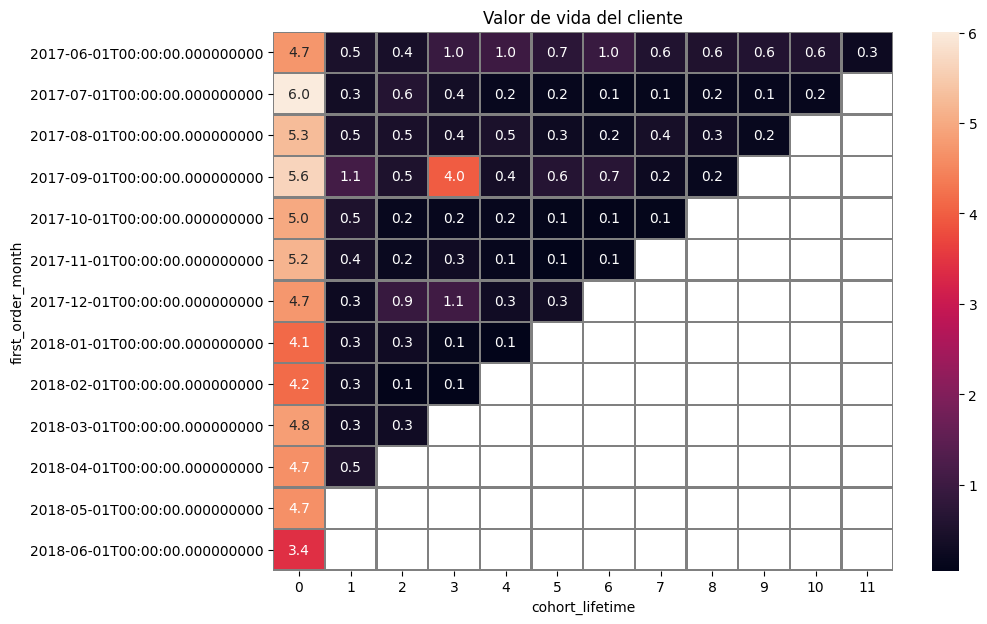

In [56]:
#Hacemos una tabla dinámica 
ltv_monthly = users_revenue_monthly.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime', 
    values='ltv', 
    aggfunc='mean')

plt.figure(figsize=(10, 7))
plt.title('Valor de vida del cliente')
sns.heatmap(
    ltv_monthly,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray')

**Observaciones** 
* Se tomó el ejemplo del primer cohorte ya que es el que tiene más tiempo de vida, un usuario en promedio trae 11.88 durante un año
* Nuevamente omitiremos el cohorte de Junio de 2018 ya que sólo hubo un pedido, probablemente es el actual y aún no se obtienen todos los datos de este mes. 
* En promedio el mes 0 del ciclo, o bien el mes de la primer orden es en el que más dinero ingresa, siendo el más alto en Julio de 2017 y el más bajo en Enero de 2018
* A partir del segundo mes del ciclo, el promedio de ingreso bajó más del 90%, excepto por el cohorte de Septiembre de 2017, que fue de 80% 
* En el cohorte de Septiembre fue el único que tuvo un incremento de más del 60% en el mes 3 del ciclo después del decremento, correspondiente a la fecha de Diciembre de 2018.

In [57]:
# Tomaremos el ejemplo del primer cohorte, Junio de 2017
ltv_2017_06 = ltv_monthly.loc['2017-06-01'].sum().round(2)
print(ltv_2017_06)

# Hacemos una comparación de 3 cohortes
print()
ltv_2017_06_6 = ltv_monthly.loc['2017-06-01'][0:6].sum().round(2)
print(ltv_2017_06_6)
ltv_2017_09 = ltv_monthly.loc['2017-09-01'][0:6].sum().round(2)
print(ltv_2017_09)
ltv_2017_12 = ltv_monthly.loc['2017-12-01'].sum().round(2)
print(ltv_2017_12)

11.88

8.36
12.31
7.64


**Observaciones** 
* Para hacer una comparación, hemos sumado los datos de los primeros 6 meses del ciclo del cohorte de Junio, Septiembre y Diciembre de 2017:
    * Los usuarios que hicieron su primera compra en Junio 2017 tuvieron un total de 8.36 en promedio durante 6 meses 
    * Los usuarios que hicieron su primera compra en Septiembre 2017 tuvieron un total de 12.31 en promedio durante 6 meses 
    * Los usuarios que hicieron su primera compra en Diciembre 2017 tuvieron un total de 7.64 en promedio
* Tomando en cuenta los datos anteriores, podemos confirmar que el periodo que brindó más ingreso en promedio fue de Septiembre a Diciembre 

### Marketing

#### ¿Cuánto dinero se gastó?

In [58]:
#Sacamos cohortes 
df_costs['cost_month'] = df_costs['dt'].astype('datetime64[M]')
df_costs['cost_month'] = df_costs['cost_month'].dt.strftime('%Y-%m')
print(df_costs)

      source_id         dt  costs cost_month
0             1 2017-06-01  75.20    2017-06
1             1 2017-06-02  62.25    2017-06
2             1 2017-06-03  36.53    2017-06
3             1 2017-06-04  55.00    2017-06
4             1 2017-06-05  57.08    2017-06
...         ...        ...    ...        ...
2537         10 2018-05-27   9.92    2018-05
2538         10 2018-05-28  21.26    2018-05
2539         10 2018-05-29  11.32    2018-05
2540         10 2018-05-30  33.15    2018-05
2541         10 2018-05-31  17.60    2018-05

[2542 rows x 4 columns]


Total de Fuente 1: 20833.269999999997
Total de Fuente 2: 42806.04
Total de Fuente 3: 141321.63
Total de Fuente 4: 61073.59999999999
Total de Fuente 5: 51757.1
Total de Fuente 9: 5517.49
Total de Fuente 10: 5822.49


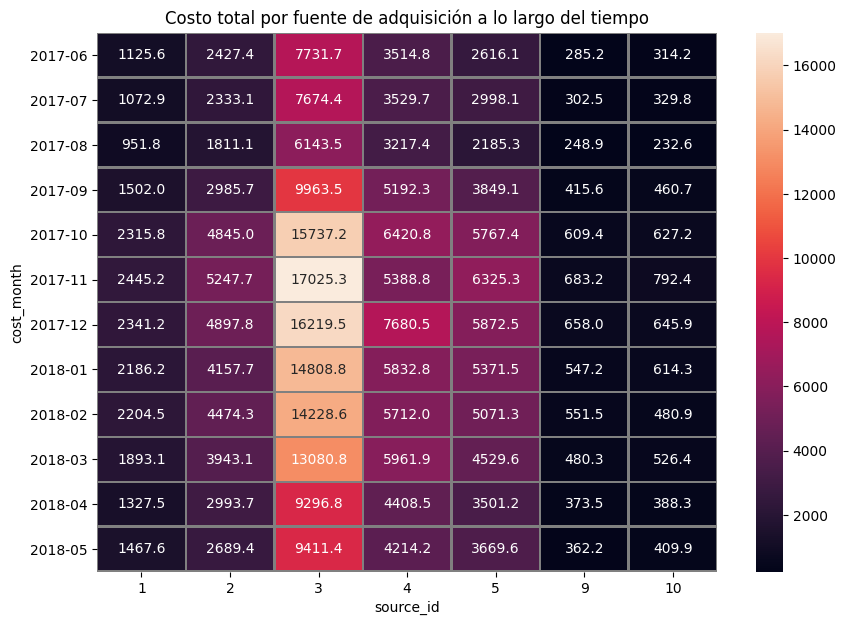

In [59]:
cost_monthly = df_costs.pivot_table(
    index='cost_month',
    columns='source_id',
    values= 'costs',
    aggfunc='sum')

plt.figure(figsize=(10, 7))
plt.title('Costo total por fuente de adquisición a lo largo del tiempo')
sns.heatmap(
    cost_monthly,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray')

source1 = cost_monthly[1].sum()
print('Total de Fuente 1:', source1)
source2 = cost_monthly[2].sum()
print('Total de Fuente 2:', source2)
source3 = cost_monthly[3].sum()
print('Total de Fuente 3:', source3)
source4 = cost_monthly[4].sum()
print('Total de Fuente 4:', source4)
source5 = cost_monthly[5].sum()
print('Total de Fuente 5:', source5)
source9 = cost_monthly[9].sum()
print('Total de Fuente 9:', source9)
source10 = cost_monthly[10].sum()
print('Total de Fuente 10:', source10)

**Observaciones**
* Podemos ver que la fuente de adquisición 3 fue la de mayor costo con un total de 141321.63, teniendo el máximo costo en el mes de Noviembre de 2017 por 17025.3, seguido de Diciembre de 2017 con 16219.5 y Octubre de 2017 con 15737.2
* Vemos que la fuente 9 y 10 son las menos costosas durante todo el ciclo 
* El mes de Noviembre de 2017 fue el más costosos en todas las fuentes excepto por la fuente 4, la cual su mes más costoso fue Diciembre de 2017. 

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [60]:
#Sacamos el costo por fuente por cada mes 
cost_per_source = df_costs.groupby(['cost_month','source_id']).agg({'costs': 'sum'}).reset_index()
print(cost_monthly)

source_id        1        2         3        4        5       9       10
cost_month                                                              
2017-06     1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07     1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08      951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09     1502.01  2985.66   9963.55  5192.26  3849.14  415.62  460.67
2017-10     2315.75  4845.00  15737.24  6420.84  5767.40  609.41  627.24
2017-11     2445.16  5247.68  17025.34  5388.82  6325.34  683.18  792.36
2017-12     2341.20  4897.80  16219.52  7680.47  5872.52  657.98  645.86
2018-01     2186.18  4157.74  14808.78  5832.79  5371.52  547.16  614.35
2018-02     2204.48  4474.34  14228.56  5711.96  5071.31  551.50  480.88
2018-03     1893.09  3943.14  13080.85  5961.87  4529.62  480.29  526.41
2018-04     1327.49  2993.70   9296.81  4408.49  3501.15  373.49  388.25
2018-05     1467.61  2689.44   9411.42  4214.21  36

In [61]:
# Para agregar la fuente de orden tomamos la fuente a partir de la visita y basada en la fecha de la orden, tomamos esa fuente y ese revenue
# df_visits_orders es un merge de visits y orders
source_uid = df_visits_orders.loc[:,['buy_ts','uid','source_id','device','revenue']]
source_uid['order_month'] = source_uid['buy_ts'].astype('datetime64[M]')
source_uid = source_uid.drop_duplicates()
rev_per_source = source_uid.groupby(['order_month','source_id']).agg({'uid':'nunique','revenue': 'sum'}).reset_index()
rev_per_source['order_month'] = rev_per_source['order_month'].dt.strftime('%Y-%m')
print(rev_per_source)


   order_month  source_id   uid  revenue
0      2017-06          1   401  2760.17
1      2017-06          2   457  3492.17
2      2017-06          3   874  4314.20
3      2017-06          4   644  4205.78
4      2017-06          5   571  3333.91
..         ...        ...   ...      ...
81     2018-05          4  1307  9016.34
82     2018-05          5   956  8155.16
83     2018-05          9   182  1147.15
84     2018-05         10   203  1166.53
85     2018-06          4     1     3.42

[86 rows x 4 columns]


In [62]:
# Unimos el número de usuarios que hicieron ordenes por mes 
cost_rev_merged = pd.merge(cost_per_source, rev_per_source, left_on=['cost_month','source_id'], right_on=['order_month','source_id'])[['order_month','source_id','costs','uid','revenue']]
print(cost_rev_merged)

   order_month  source_id    costs   uid  revenue
0      2017-06          1  1125.61   401  2760.17
1      2017-06          2  2427.38   457  3492.17
2      2017-06          3  7731.65   874  4314.20
3      2017-06          4  3514.80   644  4205.78
4      2017-06          5  2616.12   571  3333.91
..         ...        ...      ...   ...      ...
79     2018-05          3  9411.42  1323  8988.74
80     2018-05          4  4214.21  1307  9016.34
81     2018-05          5  3669.56   956  8155.16
82     2018-05          9   362.17   182  1147.15
83     2018-05         10   409.86   203  1166.53

[84 rows x 5 columns]


In [63]:
# Sacamos el CAC de cada fuente por mes
cost_rev_merged['ltv'] = cost_rev_merged['revenue']/ cost_rev_merged['uid']
cost_rev_merged['cac'] = cost_rev_merged['costs'] / cost_rev_merged['uid']
print(cost_rev_merged)

   order_month  source_id    costs   uid  revenue       ltv       cac
0      2017-06          1  1125.61   401  2760.17  6.883217  2.807007
1      2017-06          2  2427.38   457  3492.17  7.641510  5.311554
2      2017-06          3  7731.65   874  4314.20  4.936156  8.846281
3      2017-06          4  3514.80   644  4205.78  6.530714  5.457764
4      2017-06          5  2616.12   571  3333.91  5.838722  4.581646
..         ...        ...      ...   ...      ...       ...       ...
79     2018-05          3  9411.42  1323  8988.74  6.794210  7.113696
80     2018-05          4  4214.21  1307  9016.34  6.898500  3.224338
81     2018-05          5  3669.56   956  8155.16  8.530502  3.838452
82     2018-05          9   362.17   182  1147.15  6.303022  1.989945
83     2018-05         10   409.86   203  1166.53  5.746453  2.019015

[84 rows x 7 columns]


<AxesSubplot:title={'center':'Costo de adquisición de clientes por fuente'}, xlabel='source_id', ylabel='order_month'>

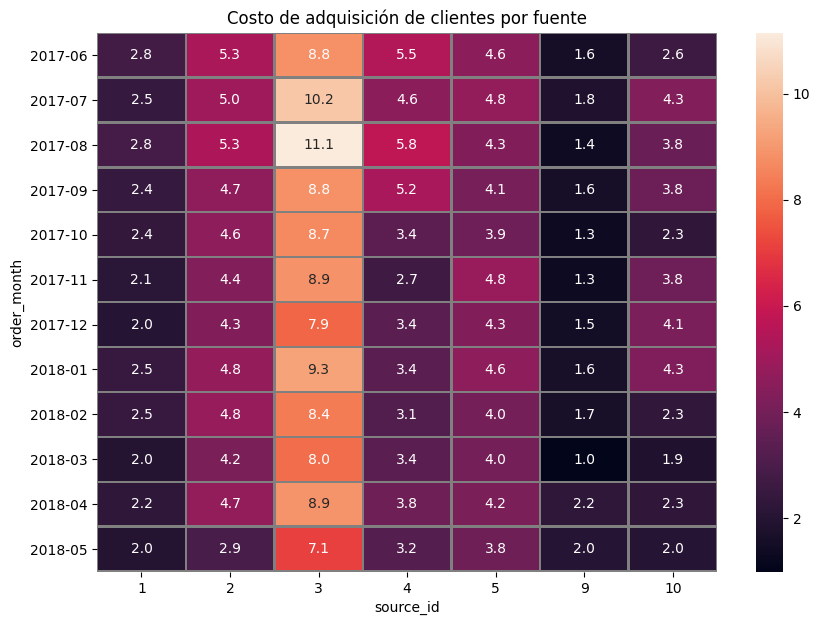

In [64]:
# Hacemos una tabla dinámica del promedio por fuente según el mes 
cac_monthly = cost_rev_merged.pivot_table(
    index='order_month',
    columns='source_id',
    values= 'cac',
    aggfunc='mean')

plt.figure(figsize=(10, 7))
plt.title('Costo de adquisición de clientes por fuente')
sns.heatmap(
    cac_monthly,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray')

   source_id         ltv         cac     benefit    percent
0          1  140.483055   28.101850  112.381205  79.996271
1          2  149.044104   55.041128   94.002976  63.070577
2          3   90.268332  106.100229  -15.831897 -17.538706
3          4   92.545435   47.469965   45.075469  48.706313
4          5  109.944328   51.457559   58.486769  53.196713
5          9   66.137217   18.978351   47.158866  71.304582
6         10   55.042753   37.475290   17.567464  31.916034


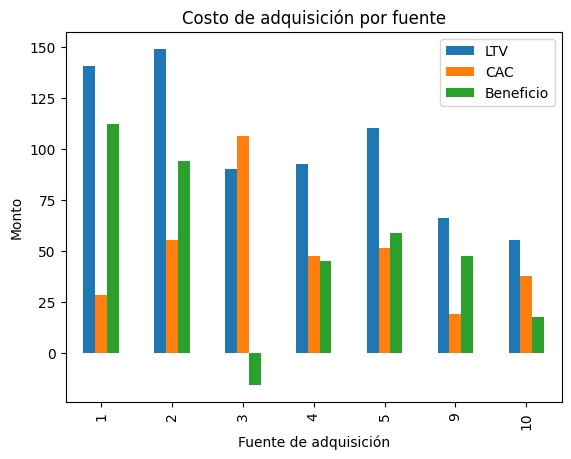

In [65]:
# Hacemos un gráfico para comparar CAC y LTV
cac_ltv_graphic = cost_rev_merged.groupby('source_id').agg({'ltv':'sum','cac':'sum'}).reset_index()
cac_ltv_graphic['benefit'] = cac_ltv_graphic['ltv'] - cac_ltv_graphic['cac']
cac_ltv_graphic['percent'] = (cac_ltv_graphic['benefit'] * 100) / cac_ltv_graphic['ltv']
print(cac_ltv_graphic)

cac_ltv_graphic.plot(x='source_id',
                  y=['ltv','cac','benefit'],
                  kind='bar',
                  title='Costo de adquisición por fuente',
                  xlabel='Fuente de adquisición',
                  ylabel= 'Monto')
plt.legend(['LTV','CAC','Beneficio'])
plt.show()

**Observaciones**
* Las fuentes 1 es la que genera un mayor beneficio de un 80%
* La fuente que genera mayor costo es la fuente 3, como habíamos analizado anteriormente, sin embargo no genera ningun beneficio
* La fuente con menor CAC es la 9, es la segunda con mayor beneficio de un 71%, habría que considerar invertir más en esta fuente
* La fuente 2 tiene el mayor LTV, su CAC es el segundo más caro, sin embargo su beneficio es de 63% 

#### ¿Cuán rentables eran las inversiones? 

In [66]:
#Obtenemos el ROMI
cost_rev_merged['romi'] = cost_rev_merged['ltv']/cost_rev_merged['cac']
print(cost_rev_merged)

   order_month  source_id    costs   uid  revenue       ltv       cac  \
0      2017-06          1  1125.61   401  2760.17  6.883217  2.807007   
1      2017-06          2  2427.38   457  3492.17  7.641510  5.311554   
2      2017-06          3  7731.65   874  4314.20  4.936156  8.846281   
3      2017-06          4  3514.80   644  4205.78  6.530714  5.457764   
4      2017-06          5  2616.12   571  3333.91  5.838722  4.581646   
..         ...        ...      ...   ...      ...       ...       ...   
79     2018-05          3  9411.42  1323  8988.74  6.794210  7.113696   
80     2018-05          4  4214.21  1307  9016.34  6.898500  3.224338   
81     2018-05          5  3669.56   956  8155.16  8.530502  3.838452   
82     2018-05          9   362.17   182  1147.15  6.303022  1.989945   
83     2018-05         10   409.86   203  1166.53  5.746453  2.019015   

        romi  
0   2.452155  
1   1.438658  
2   0.557992  
3   1.196592  
4   1.274372  
..       ...  
79  0.955089  
80 

<AxesSubplot:title={'center':'Retorno de inversión por fuente'}, xlabel='source_id', ylabel='order_month'>

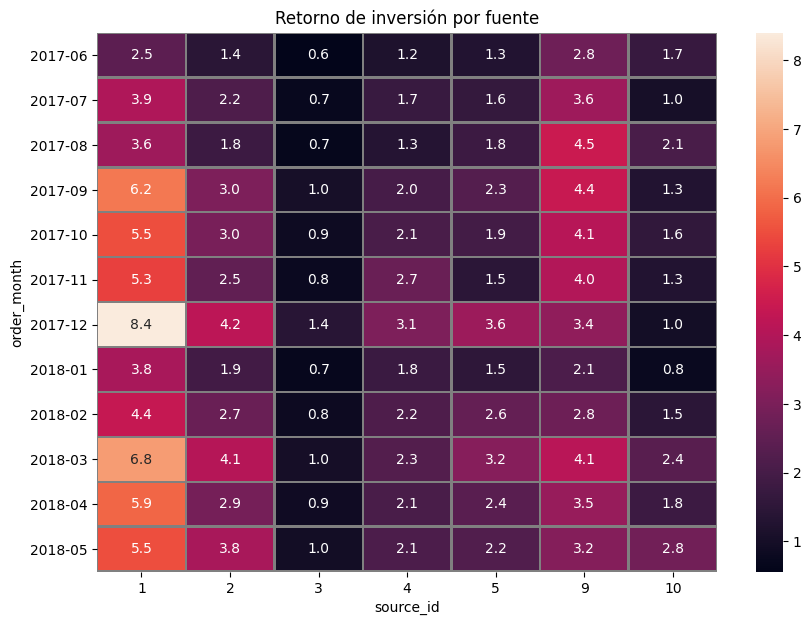

In [67]:
# Hacemos una tabla dinámica para verificar el retorno de la inversión
romi_monthly = cost_rev_merged.pivot_table(
    index='order_month',
    columns='source_id',
    values= 'romi',
    aggfunc='mean')

plt.figure(figsize=(10, 7))
plt.title('Retorno de inversión por fuente')
sns.heatmap(
    romi_monthly,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray')

In [68]:
# Sacamos el promedio de todo el ciclo por cada fuente
print(romi_monthly.cumsum(axis=0).mean(axis=0))

source_id
1     30.888668
2     16.272032
3      5.327328
4     12.429420
5     12.840201
9     23.571181
10     9.579079
dtype: float64


**Observaciones**
* La fuente 1 tiene le mayor retorno de inversión, seguida de la fuente 9 
* La fuente que tiene menor retorno de inversión es la fuente 3 


## Conclusiones

* Debemos tener en cuenta que no sabemos el tipo de servicio de la compañía
* Al tener 2 dispositivos, *touch* y *desktop*, asumimos que es una compañía que tiene su propia aplicación, y su sitio web. 
    * Después del análisis observamos que el dispositivo *desktop* tiene más visitas diarias, mensuales y anuales 
    * La duración de visita es mayor en *desktop*, pero al no conocer el servicio, no podemos confirmar si esto es más conveniente o no. O si implica que *touch* es más fácil de usar y por eso tiene menor duración de visita 
    * En ambos dispositivos se tienen en promedio 1 visita al día
* Los usuarios normalmente regresan 1 vez al mes, podemos asumir que es debido a que el servicio que ofrece es necesario sólo una vez al mes 
* Más del 70% de los usuarios hacen su compra en el primes mes de visita, a partir del segundo mes las ordenes bajan más de un 90%. Puede ser un indicador que el servicio no fue de su agrado o que no es necesario tan seguido 
* Los meses con mayor auge para los pedidos son de Octubre a Diciembre, En el mes de Diciembre es en el que se hace un mayor promedio de compra.
* El promedio de compra aumenta a partir del primer mes de visita, podemos asumir que con el tiempo los usuarios hacen un mayor pedido, y al inicio hacen la prueba con un pedido pequeño. 
* El periodo que brindó más ingreso en promedio fue de Septiembre a Diciembre
* La fuente más costosa es la 3, tiene el menor retorno de inversión y sugiere que su economía unitaria por cliente NO es sólida, se recomienda reducir la inversión en esta fuente de adquisición
* Las fuentes con mejor prospecto, ya que tienen el mayor retorno de inversión es la 1 y la 9:
    * Recomendamos incrementar la inversión en estas fuentes
    * Además de brindar un refuerzo a partir del mes de Septiembre 